In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!pip install -q kaggle


In [19]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [22]:
import zipfile
import os

zip_file = "chest-xray-pneumonia.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Dataset extracted successfully")


Dataset extracted successfully


In [23]:
base_dir = "/content/chest_xray"

print("Folders:", os.listdir(base_dir))
print("Classes:", os.listdir(os.path.join(base_dir, "train")))


Folders: ['train', '__MACOSX', 'val', 'chest_xray', 'test']
Classes: ['PNEUMONIA', 'NORMAL']


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [26]:
base_dir = "/content/chest_xray"

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [29]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 643ms/step - accuracy: 0.7477 - loss: 0.6172 - val_accuracy: 0.8750 - val_loss: 0.4202
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.8704 - loss: 0.2955 - val_accuracy: 0.6250 - val_loss: 0.8509
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 622ms/step - accuracy: 0.8853 - loss: 0.2793 - val_accuracy: 0.8750 - val_loss: 0.5006
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 635ms/step - accuracy: 0.8953 - loss: 0.2534 - val_accuracy: 0.8125 - val_loss: 0.5404
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - accuracy: 0.9198 - loss: 0.2004 - val_accuracy: 0.7500 - val_loss: 0.4346
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 630ms/step - accuracy: 0.9116 - loss: 0.2245 - val_accuracy: 0.8750 - val_loss: 0.3447
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 632ms/step - accuracy: 0.9162 - loss: 0.2024 - val_accuracy: 0.6250 - val_loss: 1.2084
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 616ms/step - accuracy: 0.9304 -

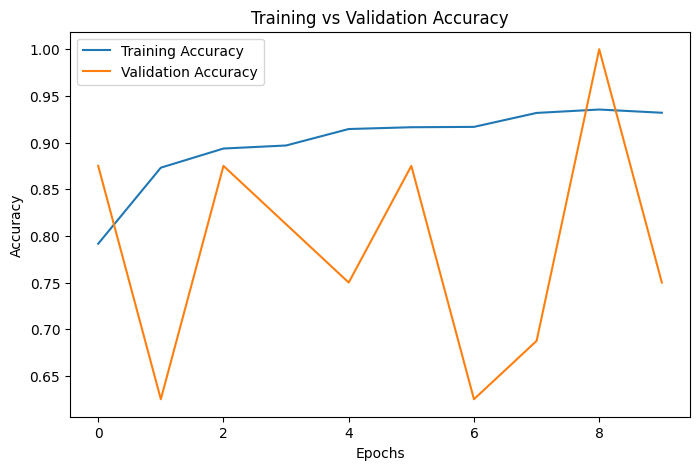

In [32]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


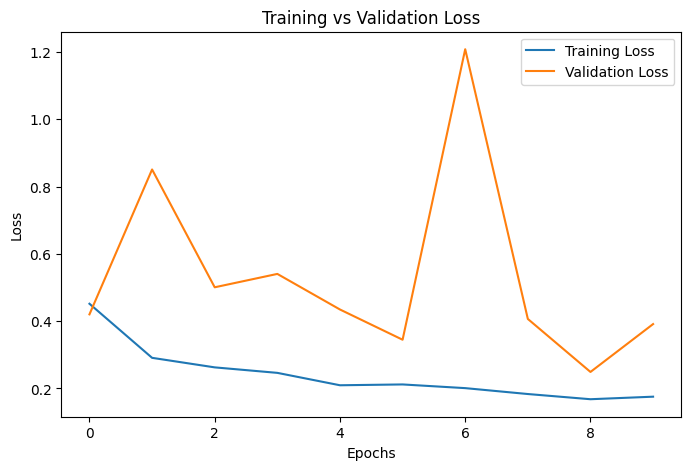

In [33]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [36]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


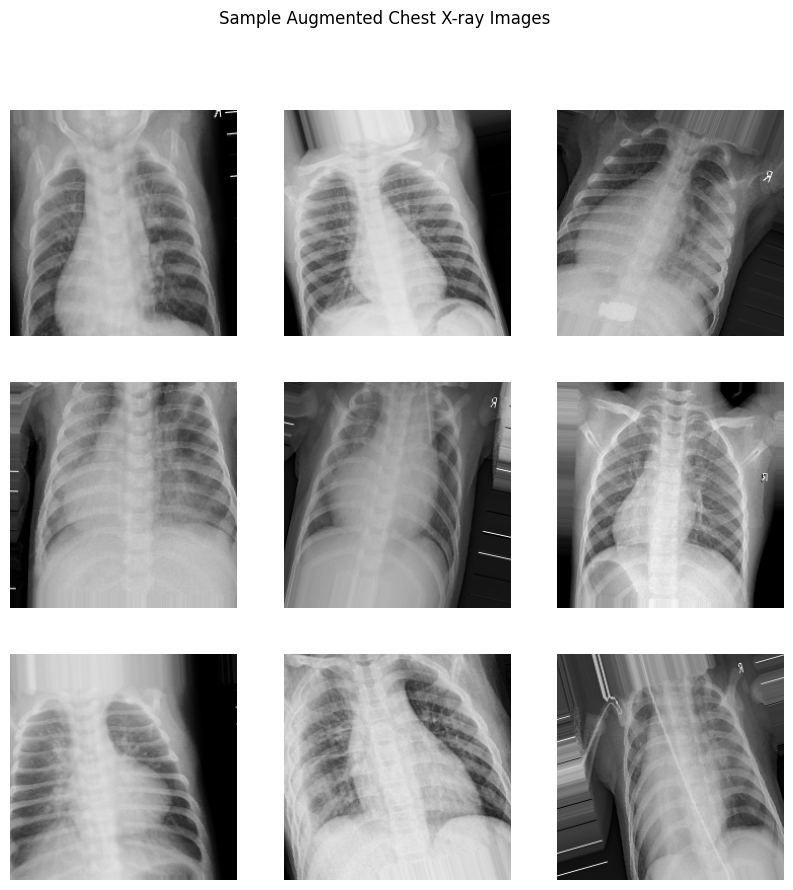

In [37]:
import matplotlib.pyplot as plt

# Get one batch of images
images, labels = next(train_generator)

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.suptitle("Sample Augmented Chest X-ray Images")
plt.show()


# Task
Organize the notebook by adding markdown cells with appropriate headings such as 'Setup', 'Data Loading', 'Data Preparation', 'Model Definition', 'Training', and 'Visualization' above their respective code cells.

## Organize Notebook Structure

### Subtask:
Add markdown cells with appropriate headings to organize the notebook into sections like 'Setup', 'Data Loading', 'Data Preparation', 'Model Definition', 'Training', and 'Visualization'.


## Setup

## Data Loading

## Data Preparation

## Model Definition

## Training


## Visualization

## Visualization

## Final Task

### Subtask:
Confirm that the notebook has been successfully organized with headings for all relevant cells.


## Summary:

### Q&A
The notebook has been successfully organized with markdown headings for all relevant cells, including 'Setup', 'Data Loading', 'Data Preparation', 'Model Definition', 'Training', and 'Visualization'.

### Data Analysis Key Findings
*   Markdown cells with specific headings were successfully added to organize the notebook.
*   The following headings were inserted above their respective code sections:
    *   `## Setup`
    *   `## Data Loading`
    *   `## Data Preparation`
    *   `## Model Definition`
    *   `## Training`
    *   `## Visualization`
*   The notebook is now structured with appropriate markdown headings as per the task requirements.

### Insights or Next Steps
*   The successful organization of the notebook significantly improves its readability and maintainability, making it easier for others (or future self) to understand the workflow.
